In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Preprocessing the training set ..

In [2]:
train_datagen=ImageDataGenerator(
                                rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=False)
training_set=train_datagen.flow_from_directory(
'training_set',
target_size=(64,64),
batch_size=32,
class_mode='binary')

Found 8000 images belonging to 2 classes.


#### Preprocessing the testing set..

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('test_set',
                                                     target_size=(64,64),
                                                     batch_size=32,
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


#### Fitting the CNN model ..

In [5]:
cnn=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
     keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
cnn.fit(x=training_set,validation_data=test_set,epochs=5)

Epoch 1/5
250/250 [==============================] - 43s 173ms/step - loss: 0.6708 - accuracy: 0.5813 - val_loss: 0.6262 - val_accuracy: 0.6415
Epoch 2/5
250/250 [==============================] - 43s 173ms/step - loss: 0.5954 - accuracy: 0.6862 - val_loss: 0.5648 - val_accuracy: 0.7095
Epoch 3/5
250/250 [==============================] - 43s 173ms/step - loss: 0.5461 - accuracy: 0.7230 - val_loss: 0.5887 - val_accuracy: 0.7105
Epoch 4/5
250/250 [==============================] - 43s 173ms/step - loss: 0.5191 - accuracy: 0.7361 - val_loss: 0.5029 - val_accuracy: 0.7565
Epoch 5/5
250/250 [==============================] - 43s 173ms/step - loss: 0.4890 - accuracy: 0.7598 - val_loss: 0.4889 - val_accuracy: 0.7620


In [27]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

### Predicting the result of single image..

Text(0.5, 1.0, 'Dog')

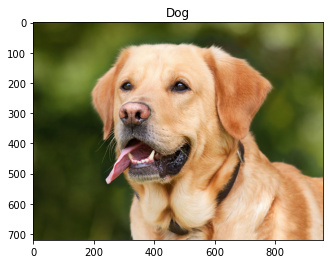

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('single_prediction/cat_or_dog_1.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
if result[0][0]==1:
    prediction='Dog'
else: 
    prediction='Cat'
from PIL import Image
pil_im=Image.open('single_prediction/cat_or_dog_1.jpg')
im_array=np.asarray(pil_im)
plt.imshow(im_array)
plt.title(prediction)

In [28]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

Text(0.5, 1.0, 'Cat')

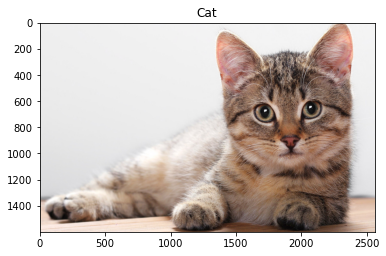

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('single_prediction/cat_or_dog_2.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
if result[0][0]==1:
    prediction='Dog'
else: 
    prediction='Cat'
from PIL import Image
pil_im=Image.open('single_prediction/cat_or_dog_2.jpg')
im_array=np.asarray(pil_im)
plt.imshow(im_array)
plt.title(prediction)

## Thank You !!